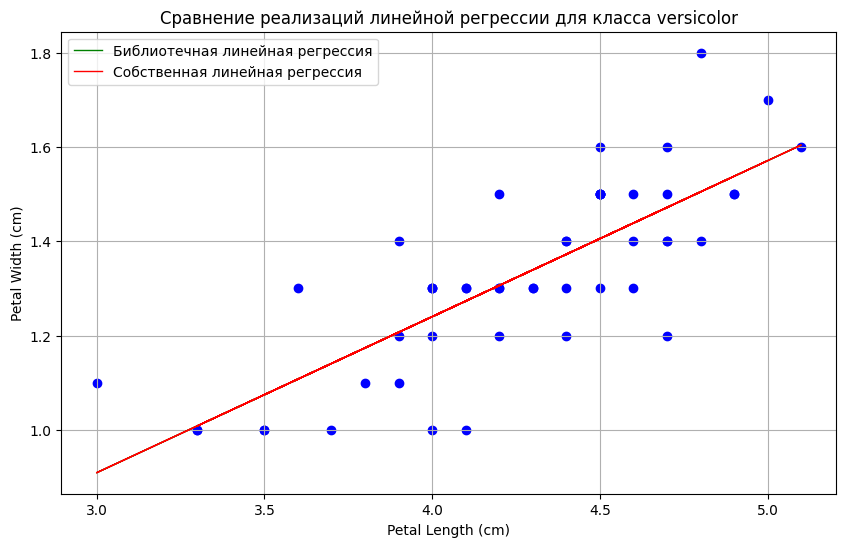

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris

class LinearRegression2:

    def __init__(self, learn_speed=0.001, count_of_iters=700000):
        self.learn_speed = learn_speed
        self.count_of_iters = count_of_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.count_of_iters):
            y_pred = X.dot(self.weights) + self.bias

            derivative_weights = np.dot(X.T, (y_pred - y)) / m
            derivative_bias = np.sum(y_pred - y) / m

            self.weights -= self.learn_speed * derivative_weights
            self.bias -= self.learn_speed * derivative_bias

    def predict(self, X):
        y_pred = X.dot(self.weights) + self.bias
        return y_pred


iris = load_iris(as_frame=True)
data = iris.frame
versicolor_data = data[data['target'] == 1]
X = versicolor_data['petal length (cm)'].values.reshape(-1, 1)
Y = versicolor_data['petal width (cm)'].values

# Библиотечная линейная регрессия
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Собственная линейная регрессия
model2 = LinearRegression2()
model2.fit(X, Y)
Y_pred2 = model2.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='green', linewidth=1, label='Библиотечная линейная регрессия')
plt.plot(X, Y_pred2, color='red', linewidth=1, label='Собственная линейная регрессия')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.title('Сравнение реализаций линейной регрессии для класса versicolor')
plt.grid(True)
plt.savefig('output.png')
plt.show()


In [52]:
from sklearn.metrics import mean_squared_error

library_coef = model.coef_[0]
library_intercept = model.intercept_
library_mse = mean_squared_error(Y, Y_pred)

custom_coef = model2.weights[0]
custom_intercept = model2.bias
custom_mse = mean_squared_error(Y, Y_pred2)

print("Библиотечная линейная регрессия:")
print("Coefficients:", library_coef)
print("Intercept:", library_intercept)
print("MSE:", library_mse)

print("\nСобственная линейная регрессия:")
print("Coefficients:", custom_coef)
print("Intercept:", custom_intercept)
print("MSE:", custom_mse)

Библиотечная линейная регрессия:
Coefficients: 0.3310536044362292
Intercept: -0.08428835489833664
MSE: 0.014607319778188538

Собственная линейная регрессия:
Coefficients: 0.33103945524283146
Intercept: -0.08422739772142897
MSE: 0.01460731982197635


**Выводы:**

Библиотечная линейная регрессия и собственная линейная регрессия показывают очень близкие результаты.

Среднеквадратичная ошибка также практически одинакова для обеих моделей.

В целом, можно утверждать, что собственная реализация линейной регрессии дает аналогичные результаты библиотечной модели.